In [2]:
import numpy as np
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [3]:
las=lasio.read("Devon_Lane 64-1_HRA digits.las")
las2=lasio.read("D:/Jamal/Fall 20/ML Brittleness prediction/Well logs/Logs_Processed-Lane/LAS/Lane_64-1_Processed_ShaleOilElan_14000-15530.las")
las3=lasio.read("DEVON_Lane_64-1_810774_RQL.las")

In [4]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="3", descr="CWLS LOG ASCII STANDA...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH S...),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="DELIMITING CHARACT...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="ft", value="14000", descr="First reference...),
  HeaderItem(mnemonic="STOP", unit="ft", value="15490", descr="Last reference ...),
  HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr="Step increment"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999", descr="Missing value"),
  HeaderItem(mnemonic="WELL", unit="", value="Lane 64-1", descr="Well name"),
  HeaderItem(mnemonic="COMP", unit="COMP", value="DEVON ENERGY CORPORATION", d...),
  HeaderItem(mnemonic="FLD", unit="FLD", value="ETHEL", descr=""),
  HeaderItem(mnemonic="API", unit="API", value="17-037-20149", descr=""),
  HeaderItem(mnemonic="COUNTRY", unit="COUNTRY", value="USA", descr=""),
  HeaderItem(mnemonic="SRVC

In [5]:
las2.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS Log Ascii Stan...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth s...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="F", value="14000.0", descr="Start Depth"),
  HeaderItem(mnemonic="STOP", unit="F", value="15530.0", descr="Stop Depth"),
  HeaderItem(mnemonic="STEP", unit="F", value="0.5", descr="Increment"),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Null Data Value"),
  HeaderItem(mnemonic="COMP", unit="", value="Devon Energy Corp.", descr="Comp...),
  HeaderItem(mnemonic="WELL", unit="", value="Lane 64-1", descr="Well"),
  HeaderItem(mnemonic="FLD", unit="", value="Ethel", descr="Field"),
  HeaderItem(mnemonic="LOC", unit="", value="1519' FEL & 406' FSL of the", des...),
  HeaderItem(mnemonic="LOC1", unit="", value="John Chance Land Surveys, Inc.",...),
  HeaderItem(mnemonic="STAT", unit="", value="Lousiana", descr="State"),
  HeaderItem(mnemonic="CNTY", uni

In [6]:
las3.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="3", descr="CWLS LOG ASCII STANDA...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH S...),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="DELIMITING CHARACT...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="FT", value="14000", descr="First reference...),
  HeaderItem(mnemonic="STOP", unit="FT", value="15490", descr="Last reference ...),
  HeaderItem(mnemonic="STEP", unit="FT", value="0.5", descr="Step increment"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999", descr="Missing value"),
  HeaderItem(mnemonic="WELL", unit="", value="Lane 64-1", descr="Well name"),
  HeaderItem(mnemonic="UWI", unit="UWI", value="", descr=""),
  HeaderItem(mnemonic="COMP", unit="COMP", value="DEVON ENERGY CORPORATION", d...),
  HeaderItem(mnemonic="FLD", unit="FLD", value="ETHEL", descr=""),
  HeaderItem(mnemonic="API", unit="API", value="17-037-20149", descr=""),
  HeaderItem(mnemonic="LOC", unit="LOC

In [7]:
df_hra = las.df()
df_elan = las2.df()
df_rql=las3.df()

In [8]:
df_rql

,BHC,CBW,CGIP_FREE,DGD,EPOR,ERR_TRA,GAS_SAT,GFP,GIP_FREE,H2O_SAT,OIL_SAT,PERM_PRES,RQI,TOC
MD,,,,,,,,,,,,,,
14000.0,0.389311,1.725230,141.495500,2.715247,1.745814,28.05430,54.65510,1.182147,39.26133,27.66153,21.510240,0.000094,104.0,1.009732
14000.5,0.400633,1.587397,141.450200,2.713212,1.755866,28.49109,54.61265,1.183875,39.48919,27.40098,21.692070,0.000095,104.0,0.976730
14001.0,0.390956,1.689737,141.404700,2.714426,1.760759,28.06528,53.84951,1.163321,39.10029,28.25747,21.516190,0.000095,104.0,0.953714
14001.5,0.384353,1.750642,141.359800,2.715524,1.817945,29.20753,53.50878,1.170296,40.19756,28.11625,22.017080,0.000096,104.0,0.938023
14002.0,0.370350,2.050918,141.313600,2.715595,1.964483,29.74136,53.24891,1.205841,43.30813,27.60061,22.810370,0.000097,104.0,0.933716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488.0,0.493682,3.602468,0.166857,2.715634,1.529613,96.33662,39.44115,0.450880,24.50743,49.48305,10.135640,0.000082,102.0,0.295029
15488.5,0.467121,3.500513,0.137686,2.729539,1.649613,160.95080,37.96977,0.438444,25.43013,51.54902,8.286498,0.000077,102.0,0.093558
15489.0,0.392477,3.856240,0.107400,2.746927,1.967731,189.22290,35.50444,0.474202,28.46877,54.99071,6.735710,0.000071,102.0,-0.111319


In [9]:
df=df_elan.join(df_hra,how='outer')
Well_name="Lane"
df=df.loc[:,["RHOZ","GR","AT90","DPHZ","NPHI","TAG2ALL_10","TAG2ALL_10_D"]]
df

,RHOZ,GR,AT90,DPHZ,NPHI,TAG2ALL_10,TAG2ALL_10_D
14000.0,2.650017,37.501305,6.977732,-0.000011,0.096006,2.0,3.511326
14000.5,2.647860,38.532391,7.302729,0.001297,0.097059,2.0,3.686287
14001.0,2.644198,38.776794,6.956556,0.003517,0.098025,2.0,3.111346
14001.5,2.638772,39.746777,6.442676,0.006805,0.104045,2.0,3.309211
14002.0,2.633837,39.219776,6.073905,0.009796,0.113373,2.0,3.126088
...,...,...,...,...,...,...,...
15528.0,2.652989,43.992970,6.963647,-0.001812,0.207959,NaN,NaN
15528.5,2.653587,43.992970,6.552801,-0.002174,0.205501,NaN,NaN
15529.0,2.659489,43.992970,6.109800,-0.005751,0.204040,NaN,NaN
15529.5,2.664687,43.992970,5.657918,-0.008901,0.207643,NaN,NaN


In [10]:
# def logs(las_file,las_file2):
    
#     df = las_file.df()
#     df2 = las_file2.df()
#     Dens=pd.DataFrame(df2[Dens_name])
#     GR=pd.DataFrame(df2[GR_name])
#     Res=pd.DataFrame(df2[Res_name])
#     Por_dens=pd.DataFrame(df2[Por_dens_name])
#     Por_neut=pd.DataFrame(df2[Por_neut_name])
#     Rock_class=pd.DataFrame(df[Rock_class_name])
#     Logs_comb=pd.concat([Dens,GR,Res,Por_dens,Por_neut,Rock_class],axis=1)
    
#     return Logs_comb

In [11]:
# Vel=logs(las,las2)
# Vel.info()

In [12]:
# def logs_mod(dataframe):
    
#     Dens_f=dataframe[Dens_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     GR_f=dataframe[GR_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Res_f=dataframe[Res_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Por_dens_f=dataframe[Por_dens_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Por_neut_f=dataframe[Por_neut_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Vp_f=dataframe[Vp_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Vs_f=dataframe[Vs_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Logs_comb_f=pd.concat([Dens_f,GR_f,Res_f,Por_dens_f,Por_neut_f,Vp_f,Vs_f],axis=1)
#     return Logs_comb_f

In [13]:
# Vel_f=logs_mod(Vel)
# Vel_f.info()

In [14]:
def tms(df,form_top,form_bottom):
    df_tms=df[form_top:form_bottom]
    return df_tms

In [15]:
tms_start_depth=14000
tms_stop_depth=15490
Vel_ub=tms(df,tms_start_depth,tms_stop_depth)
Vel_ub

,RHOZ,GR,AT90,DPHZ,NPHI,TAG2ALL_10,TAG2ALL_10_D
14000.0,2.650017,37.501305,6.977732,-0.000011,0.096006,2.0,3.511326
14000.5,2.647860,38.532391,7.302729,0.001297,0.097059,2.0,3.686287
14001.0,2.644198,38.776794,6.956556,0.003517,0.098025,2.0,3.111346
14001.5,2.638772,39.746777,6.442676,0.006805,0.104045,2.0,3.309211
14002.0,2.633837,39.219776,6.073905,0.009796,0.113373,2.0,3.126088
...,...,...,...,...,...,...,...
15488.0,2.736887,39.868671,23.989498,-0.052659,0.061238,1.0,37.734660
15488.5,2.738402,58.199078,19.220522,-0.053577,0.106107,1.0,41.096980
15489.0,2.728396,75.956657,11.017330,-0.047513,0.138618,3.0,17.020060
15489.5,2.705626,84.205338,9.452075,-0.033712,0.161152,3.0,15.898060


In [16]:
# writer = pd.ExcelWriter('Well-'+Well_name+'.xlsx', engine='xlsxwriter')
# Vel_ub.to_excel(writer,sheet_name=Well_name)
# writer.save()

In [17]:
df2=Vel_ub
df2.reset_index(inplace=True)
df2.head()

,index,RHOZ,GR,AT90,DPHZ,NPHI,TAG2ALL_10,TAG2ALL_10_D
0,14000.0,2.650017,37.501305,6.977732,-0.000011,0.096006,2.0,3.511326
1,14000.5,2.647860,38.532391,7.302729,0.001297,0.097059,2.0,3.686287
2,14001.0,2.644198,38.776794,6.956556,0.003517,0.098025,2.0,3.111346
3,14001.5,2.638772,39.746777,6.442676,0.006805,0.104045,2.0,3.309211
4,14002.0,2.633837,39.219776,6.073905,0.009796,0.113373,2.0,3.126088


In [18]:
cols = ['Depth','Density','Gamma ray','Resistivity','Density porosity','Neutron porosity','Rock class','Rock class error']
df2.columns=cols
df2

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
0,14000.0,2.650017,37.501305,6.977732,-0.000011,0.096006,2.0,3.511326
1,14000.5,2.647860,38.532391,7.302729,0.001297,0.097059,2.0,3.686287
2,14001.0,2.644198,38.776794,6.956556,0.003517,0.098025,2.0,3.111346
3,14001.5,2.638772,39.746777,6.442676,0.006805,0.104045,2.0,3.309211
4,14002.0,2.633837,39.219776,6.073905,0.009796,0.113373,2.0,3.126088
...,...,...,...,...,...,...,...,...
2976,15488.0,2.736887,39.868671,23.989498,-0.052659,0.061238,1.0,37.734660
2977,15488.5,2.738402,58.199078,19.220522,-0.053577,0.106107,1.0,41.096980
2978,15489.0,2.728396,75.956657,11.017330,-0.047513,0.138618,3.0,17.020060
2979,15489.5,2.705626,84.205338,9.452075,-0.033712,0.161152,3.0,15.898060


In [19]:
df2.describe()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,14745.000000,2.626278,74.231536,8.385939,0.014377,0.199035,5.552835,7.051204
std,430.342451,0.071831,31.251338,9.938800,0.043534,0.084828,3.426453,7.110128
min,14000.000000,1.761268,13.205571,0.434258,-0.089616,0.041120,1.000000,0.260514
25%,14372.500000,2.614173,43.229519,2.010589,-0.004992,0.123166,2.000000,3.434221
50%,14745.000000,2.637722,86.840401,4.198471,0.007442,0.203528,7.000000,5.303760
75%,15117.500000,2.658237,101.619232,10.898404,0.021713,0.280430,9.000000,8.330206
max,15490.000000,2.797866,129.504623,73.205894,0.538625,0.386431,10.000000,170.510800


In [117]:
df_tms_rc=df2.loc[(df2['Depth'] >= 15042) & (df2['Depth'] <= 15250)]
df_tms_rc.describe()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,15146.000000,2.610229,94.419654,9.151614,0.024104,0.275115,8.179856,8.226565
std,60.260891,0.125910,9.607681,7.180182,0.076309,0.038047,1.515553,6.122313
min,15042.000000,1.761268,46.834217,2.228000,-0.084311,0.154853,2.000000,0.703032
25%,15094.000000,2.606937,89.742645,4.282888,-0.005821,0.259541,8.000000,4.737506
50%,15146.000000,2.631310,95.661858,7.241190,0.011327,0.282662,8.000000,7.088130
75%,15198.000000,2.659606,100.702728,11.464736,0.026099,0.300929,9.000000,9.667394
max,15250.000000,2.789113,112.961220,54.139584,0.538625,0.380707,10.000000,53.539680


In [118]:
df_tms_rc['Rock class'].unique()

array([10.,  9.,  6.,  8.,  7.,  3.,  2.])

In [120]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

facies_colors = ['lightblue', 'lightgreen','brown','black',
       'purple','olive', 'orange']

facies_labels = [2, 3, 6, 7, 8,9,10]
#facies_color_map is a dictionary that maps facies labels
#to their respective colors

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

# def label_facies(row, labels):
#     return labels[ row['Facies'] -1]
    
# training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [139]:
# logs = df_tms_rc.sort_values(by='Depth')
# cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
# bounds = [2, 3, 6, 7, 8,9,10,11]
# norm = colors.BoundaryNorm(bounds, cmap_facies.N)

# ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
# cluster=np.repeat(np.expand_dims(logs['Rock class'].values,1), 100, 1)
    
# f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
# ax[0].plot(logs['Gamma ray'], logs.Depth, '-g')
# ax[1].plot(logs.Resistivity, logs.Depth, '-')
# ax[2].plot(logs.Density, logs.Depth, '-', color='0.5')
# ax[3].plot(logs['Neutron porosity'], logs.Depth, '-', color='r')
# ax[4].plot(logs['Density porosity'], logs.Depth, '-', color='black')
# im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
#                     cmap=cmap_facies,norm=norm)

# divider = make_axes_locatable(ax[5])
# cax = divider.append_axes("right", size="20%", pad=0.05)
# cbar=plt.colorbar(im, cax=cax)
# #cbar.set_label((17*' ').join(['2', '3', '6', '7', '8','9', '10']))
# cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

# for i in range(len(ax)-1):
#         ax[i].set_ylim(ztop,zbot)
#         ax[i].invert_yaxis()
#         ax[i].grid()
#         ax[i].locator_params(axis='x', nbins=3)
        

# ax[0].set_xlabel("Gamma ray")
# ax[0].set_xlim(logs['Gamma ray'].min(),logs['Gamma ray'].max())
# ax[1].set_xlabel("Resistivity")
# ax[1].set_xlim(logs.Resistivity.min(),logs.Resistivity.max())
# ax[2].set_xlabel("Density")
# ax[2].set_xlim(logs.Density.min(),logs.Density.max())
# ax[3].set_xlabel("Neutron porosity")
# ax[3].set_xlim(logs['Neutron porosity'].min(),logs['Neutron porosity'].max())
# ax[4].set_xlabel("Density porosity")
# ax[4].set_xlim(logs['Density porosity'].min(),logs['Density porosity'].max())
# ax[5].set_xlabel('Rock class')
    
# ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
# ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
# ax[5].set_xticklabels([])

In [137]:
def make_facies_log_plot(logs, facies_colors):
    
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    bounds = [2, 3, 6, 7, 8,9,10,11]
    norm = colors.BoundaryNorm(bounds, cmap_facies.N)

    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Rock class'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 12))
    ax[0].plot(logs['Gamma ray'], logs.Depth, '-g')
    ax[1].plot(logs.Resistivity, logs.Depth, '-')
    ax[2].plot(logs.Density, logs.Depth, '-', color='0.5')
    ax[3].plot(logs['Neutron porosity'], logs.Depth, '-', color='r')
    ax[4].plot(logs['Density porosity'], logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                        cmap=cmap_facies,norm=norm)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join(['2', '3', '6', '7', '8','9', '10']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Gamma ray")
    ax[0].set_xlim(logs['Gamma ray'].min(),logs['Gamma ray'].max())
    ax[1].set_xlabel("Resistivity")
    ax[1].set_xlim(logs.Resistivity.min(),logs.Resistivity.max())
    ax[2].set_xlabel("Density")
    ax[2].set_xlim(logs.Density.min(),logs.Density.max())
    ax[3].set_xlabel("Neutron porosity")
    ax[3].set_xlim(logs['Neutron porosity'].min(),logs['Neutron porosity'].max())
    ax[4].set_xlabel("Density porosity")
    ax[4].set_xlim(logs['Density porosity'].min(),logs['Density porosity'].max())
    ax[5].set_xlabel('Rock class')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    #f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

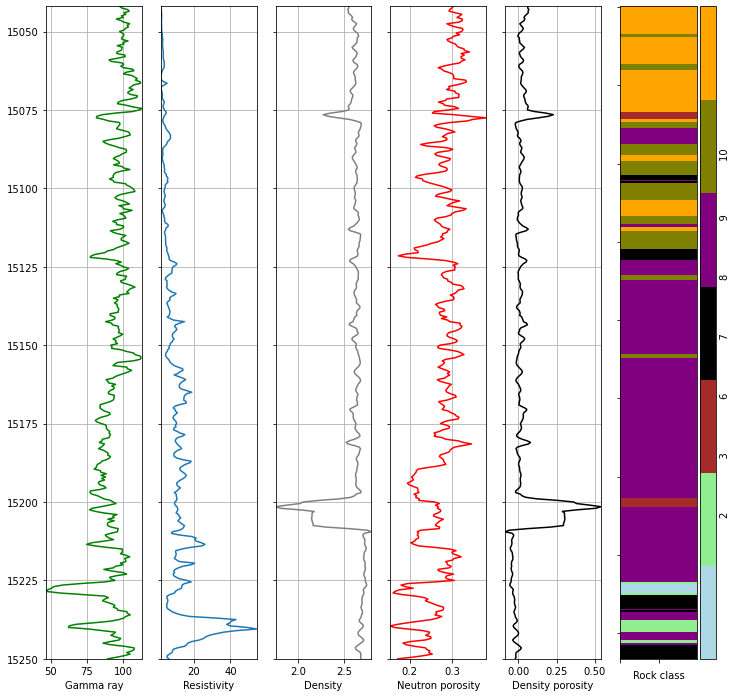

In [138]:
make_facies_log_plot(
    df_tms_rc.drop('Rock class error',axis=1),
    facies_colors)

In [76]:
df_tms_rc.groupby('Rock class').count()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class error
Rock class,,,,,,,
2.0,6,6,6,6,6,6,6
3.0,12,12,12,12,12,12,12
6.0,10,10,10,10,10,10,10
7.0,30,30,30,30,30,30,30
8.0,219,219,219,219,219,219,219
9.0,59,59,59,59,59,59,59
10.0,81,81,81,81,81,81,81


In [134]:
#df_tms_rc.loc[(df_tms_rc['Depth'] >= 15190) & (df_tms_rc['Depth'] <= 15210)]

In [157]:
def remove_outliers_index(property,lower_quant,upper_quant):
    if lower_quant>0 and upper_quant>0:
        dat=df2[property]
        P_uq=dat.quantile(upper_quant)
        P_lq=dat.quantile(lower_quant)
        index = df2[(dat >= P_uq)|(dat<=P_lq)].index
    elif lower_quant>0 and upper_quant==0:
        dat=df2[property]
        P_lq=dat.quantile(lower_quant)
        index = df2[dat<=P_lq].index
    else:
        dat=df2[property]
        P_uq=dat.quantile(upper_quant)
        index = df2[dat >= P_uq].index
    return index

In [158]:
def remove_outliers_df(df_out):
    
    uq=0.999
    lq=0.001

    #df_out.loc[remove_outliers_index('Resistivity',lq,uq),'Resistivity']=np.nan
    #df_out.loc[remove_outliers_index('Gamma ray',lq,uq),'Gamma ray']=np.nan
    df_out.loc[remove_outliers_index('Density',lq,1),'Density']=np.nan
    df_out.loc[remove_outliers_index('Density porosity',0,uq),'Density porosity']=np.nan
    #df_out.loc[remove_outliers_index('Neutron porosity',lq,uq),'Neutron porosity']=np.nan
    #df_out.loc[remove_outliers_index('Vp',lq,uq),'Vp']=np.nan
    #df_out.loc[remove_outliers_index('Vs',lq,uq),'Vs']=np.nan

    return df_out

In [159]:
df_mod=remove_outliers_df(df2)
df_mod.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-158-3e3184a7b35e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.loc[remove_outliers_index('Density',lq,1),'Density']=np.nan
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
count,2981.000000,2977.000000,2981.000000,2981.000000,2978.000000,2981.000000,2981.000000,2981.000000
mean,14745.000000,2.627035,74.231536,8.385939,0.013884,0.199035,5.552835,7.051204
std,430.342451,0.067053,31.251338,9.938800,0.040676,0.084828,3.426453,7.110128
min,14000.000000,2.018994,13.205571,0.434258,-0.089616,0.041120,1.000000,0.260514
25%,14372.500000,2.614303,43.229519,2.010589,-0.005024,0.123166,2.000000,3.434221
50%,14745.000000,2.637731,86.840401,4.198471,0.007435,0.203528,7.000000,5.303760
75%,15117.500000,2.658237,101.619232,10.898404,0.021622,0.280430,9.000000,8.330206
max,15490.000000,2.796025,129.504623,73.205894,0.382428,0.386431,10.000000,170.510800


In [160]:
def strat_split(df_f,test):

    df_f=df_f.astype('float64')
    df_f.dropna(inplace=True)
    df_f.reset_index(drop=True,inplace=True)
    split = StratifiedShuffleSplit(n_splits=1, test_size=test, random_state=42)
    for train_index, test_index in split.split(df_f, df_f["Rock class"]):
        strat_train_set = df_f.loc[train_index]
        strat_test_set = df_f.loc[test_index]
    
    strat_prop=strat_test_set["Rock class"].value_counts() / len(strat_test_set)
    full_data=df_f["Rock class"].value_counts() / len(df_f)
    train_set, test_set = train_test_split(df_f, test_size=0.2, random_state=42)
    random=test_set["Rock class"].value_counts() / len(test_set)
    compare=pd.concat([full_data,strat_prop,random],axis=1)
    compare.columns=['Full dataset','Stratified sampling','Random sampling']
    
    return strat_train_set, strat_test_set,compare

In [161]:
df2.groupby('Rock class').count()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class error
Rock class,,,,,,,
1.0,532,532,532,532,532,532,532
2.0,468,468,468,468,468,468,468
3.0,162,161,162,162,162,162,162
4.0,137,137,137,137,137,137,137
5.0,116,116,116,116,116,116,116
6.0,10,8,10,10,8,10,10
7.0,397,397,397,397,397,397,397
8.0,219,218,219,219,218,219,219
9.0,520,520,520,520,520,520,520


In [162]:
df2.drop(df2[df2['Rock class error']>40].index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [163]:
df2.drop(df2[df2['Rock class']==6].index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [164]:
df2.groupby('Rock class').count()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class error
Rock class,,,,,,,
1.0,526,526,526,526,526,526,526
2.0,458,458,458,458,458,458,458
3.0,161,160,161,161,161,161,161
4.0,137,137,137,137,137,137,137
5.0,116,116,116,116,116,116,116
7.0,394,394,394,394,394,394,394
8.0,219,218,219,219,218,219,219
9.0,519,519,519,519,519,519,519
10.0,418,418,418,418,418,418,418


In [165]:
writer = pd.ExcelWriter('Well-'+Well_name+'.xlsx', engine='xlsxwriter')
df2.to_excel(writer,sheet_name=Well_name)
writer.save()

In [166]:
train_set, test_set,sampling_table=strat_split(df2,0.25)
sampling_table

,Full dataset,Stratified sampling,Random sampling
1.0,0.178547,0.179104,0.188136
2.0,0.155465,0.156038,0.169492
3.0,0.054311,0.054274,0.050847
4.0,0.046504,0.046133,0.042373
5.0,0.039375,0.039349,0.038983
7.0,0.133741,0.132972,0.133898
8.0,0.073999,0.073270,0.074576
9.0,0.176171,0.176391,0.166102
10.0,0.141887,0.142469,0.135593


In [167]:
X_train=train_set[['Depth','Density','Gamma ray','Resistivity','Neutron porosity']]
X_test=test_set[['Depth','Density','Gamma ray','Resistivity','Neutron porosity']]
y_train=train_set['Rock class']
y_test=test_set['Rock class']

In [168]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))

In [169]:
class_names=np.sort(df2['Rock class'].unique())

In [170]:
def cross_val(model_name,model_input):
    
    from sklearn.model_selection import cross_val_score
    model=model_input
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_train_scaled)
    train_acc=accuracy_score(y_train, predictions)
    
    #Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=3)
    
    print("Accuracy on whole training set:", train_acc)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_train_scaled, y_train,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)

Accuracy on whole training set: 0.8822996831145314
Scores: [0.87109905 0.86413043 0.875     ]
Mean: 0.8700764949953789
Standard deviation: 0.004496003882639596


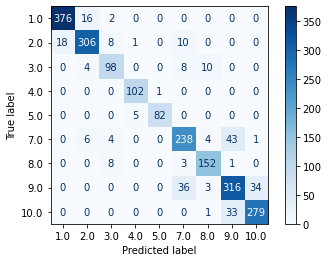

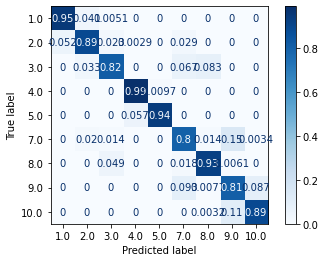

In [171]:
from sklearn.svm import SVC
svm_clf_lin=SVC(kernel='linear',C=100) #Linear
cross_val('svm_clf_lin',svm_clf_lin)

Accuracy on whole training set: 0.9022181982797646
Scores: [0.87652646 0.87228261 0.88043478]
Mean: 0.8764146166401195
Standard deviation: 0.0033290505501123516


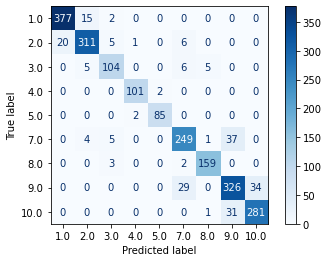

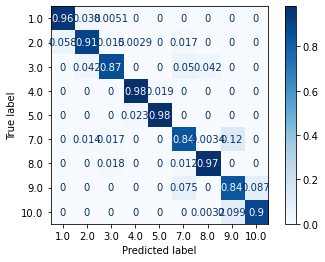

In [172]:
svm_clf_poly=SVC(kernel='poly',degree=2,C=100) #Polynomial
cross_val('svm_clf_poly',svm_clf_poly)

Accuracy on whole training set: 0.8759619737437755
Scores: [0.88466757 0.86548913 0.85733696]
Mean: 0.8691645527304191
Standard deviation: 0.011456356952539722


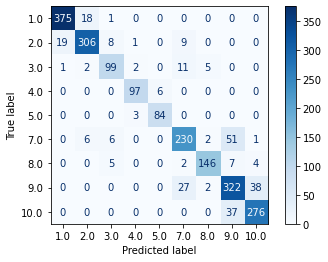

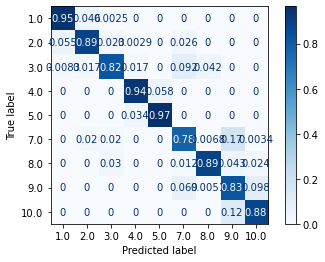

In [173]:
svm_clf_rbf=SVC(kernel='rbf',degree=3,gamma='scale') #RBF
cross_val('svm_clf_rbf',svm_clf_rbf)

Accuracy on whole training set: 0.930285196921684
Scores: [0.90230665 0.89673913 0.88451087]
Mean: 0.8945188828584351
Standard deviation: 0.007432790508693167


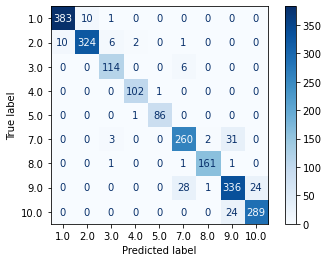

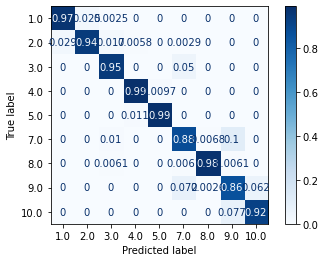

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_depth=6,n_estimators=500,random_state=42)
cross_val('rf_clf',rf_clf)

Accuracy on whole training set: 0.9769126301493889
Scores: [0.88195387 0.89945652 0.88315217]
Mean: 0.888187520893556
Standard deviation: 0.007983389835174848


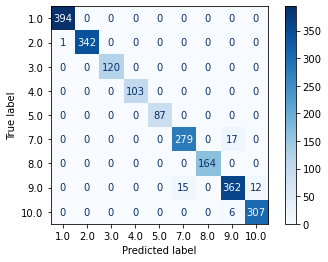

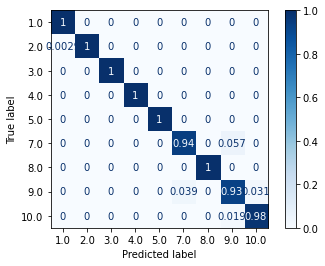

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(max_depth=5,n_estimators=200,learning_rate=0.01)
cross_val('gb_clf',gb_clf)

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import joblib
from sklearn.metrics import r2_score

def fine_tune(params,model,name):
    
    grid_search_cv = GridSearchCV(model, params, verbose=1, cv=3,refit=True, return_train_score=True)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_mod=grid_search_cv.best_estimator_
    best_score=grid_search_cv.best_score_
    cvres = grid_search_cv.cv_results_
    
    for mean_score,mean_train_score, params in zip(cvres["mean_test_score"], cvres["mean_train_score"], cvres["params"]):
        print(mean_score, mean_train_score, params)
    
    joblib.dump(best_mod, name)
    
    return best_mod, best_score

In [178]:
params = {'max_depth': list(range(2, 4)),'n_estimators': [50,100,150], 'learning_rate': [0.05, 0.1, 0.5]}
fine_tune(params,GradientBoostingClassifier(random_state=42),'GB')

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.5min finished


0.8741507384028474 0.9189679016991844 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
0.8859199555581775 0.9504291313694816 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
0.8922574626865671 0.9655950834833771 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
0.8804888600475881 0.9459041429302322 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
0.8918064076848956 0.9805339713883724 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.8954271380252886 0.9932095964068203 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.8859199555581774 0.9486184595668901 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
0.8954283670579907 0.9791754294695828 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.8954277525416395 0.9947941264008185 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
0.8904489410654238 0.9805338176549879 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.8967864481938136

(GradientBoostingClassifier(random_state=42), 0.8967864481938136)

In [179]:
params_svm = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
fine_tune(params_svm,SVC(),'SVM')

Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6858346606886516 0.6889941347639148 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.3558166430692388 0.3558169945492291 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.17836152734351954 0.17836131895864693 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.17836152734351954 0.17836131895864693 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.17836152734351954 0.17836131895864693 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.858754645743614 0.8666810253647785 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.6994130139814759 0.7014414657063864 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.3558166430692388 0.3558169945492291 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.17836152734351954 0.17836131895864693 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.17836152734351954 0.17836131895864693 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.8777708542268892 0.8890913557562699 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8560415560537235 0.8598907755049834 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.6980543183293021 0.7005362835384751

[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    7.1s finished


(SVC(C=1000, gamma=1), 0.8822973816687315)

In [180]:
params_rf = [{'n_estimators': [30,50,70,90,110], 'max_depth': [2,4,6],'min_samples_leaf': [1,3,5]}]
fine_tune(params_rf,RandomForestClassifier(),'RF')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   17.5s finished


0.636466875110613 0.6593567979672758 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
0.6423434949757142 0.6586848293436446 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
0.6618402552455116 0.6724760975333787 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 70}
0.6975934310660138 0.7091488889380836 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 90}
0.6382846144770219 0.6482643193423655 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 110}
0.6686023931724776 0.684712506272322 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 30}
0.6781421450061943 0.685375712093037 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 50}
0.6514014659902071 0.66071687721991 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 70}
0.6170174325998466 0.6346758254867814 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 90}
0.644180284349006 0.6559523721676161 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 110}
0.6247038031187934 0.642

(RandomForestClassifier(max_depth=6, n_estimators=70), 0.893614929306039)

## Predict for test set

In [181]:
model_name='RF'
loaded_model = joblib.load(model_name)
final_predictions=loaded_model.predict(X_test_scaled)
test_acc=accuracy_score(y_test, final_predictions)
test_acc

0.8005427408412483

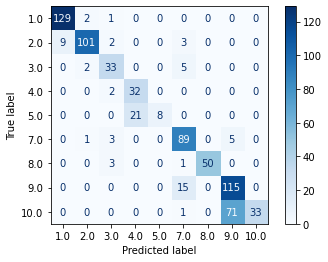

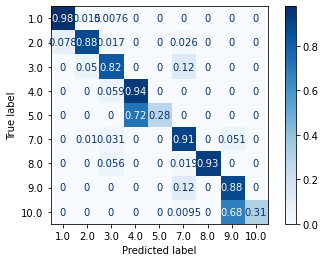

In [182]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        disp = plot_confusion_matrix(loaded_model, X_test_scaled, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)